## Data Source
Chicago Crime Data: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

Dataset downloaded from above site and used for this analysis (CSV file): https://1drv.ms/u/s!ApixK_GEPeQxwEOkSoaUroldEO6a

Weather and IUCR code are summarized by David Harding in excel format.

In [1]:
import pandas as pd
import numpy as np
import csv
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

## Read the data

In [2]:
# read Crime data set
dt = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')
data = pd.read_csv('Chicago_Crimes_2010_to_20NOV16.csv',parse_dates = ['Date'], date_parser=dt)

In [3]:
# read the temperature data (Jan-Feb)
we = pd.read_csv('weather.csv',parse_dates=['Year_Month'])
we.describe()

,Year,Month,Temparature
count,14.000000,14.000000,14.000000
mean,2013.000000,1.500000,24.021429
std,2.075498,0.518875,5.567651
min,2010.000000,1.000000,14.600000
25%,2011.250000,1.000000,20.950000
50%,2013.000000,1.500000,25.400000
75%,2014.750000,2.000000,26.675000
max,2016.000000,2.000000,32.900000


In [4]:
# read the violent crime code
violent = pd.read_csv('Violent Crime UCR Codes.csv')
violent.describe()

,UCR,UCRName
count,70,70
unique,70,70
top,0337,0497 BATTERY AGGRAVATED DOMESTIC BATTERY: OTHE...
freq,1,1


In [5]:
data.sort_values(by='Date').head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1376275,7310818,HS115552,2010-01-01 00:01:00,033XX W 38TH PL,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,12.0,58.0,05,1154683.0,1878874.0,2010,02/04/2016 06:33:39 AM,41.823445,-87.708037,"(41.823445464, -87.708036659)"
1464557,7456797,HS258006,2010-01-01 00:01:00,042XX W GRENSHAW ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,24.0,29.0,17,1148374.0,1894701.0,2010,02/04/2016 06:33:39 AM,41.867000,-87.730775,"(41.867000485, -87.730774922)"
1508794,7524875,HS328095,2010-01-01 00:01:00,042XX N PULASKI RD,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,APARTMENT,False,False,...,39.0,16.0,02,1148968.0,1927799.0,2010,02/04/2016 06:33:39 AM,41.957813,-87.727736,"(41.957813144, -87.727736315)"
188306,8809628,HV482617,2010-01-01 00:01:00,101XX S PEORIA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,34.0,73.0,06,1172101.0,1837680.0,2010,02/04/2016 06:33:39 AM,41.710038,-87.645345,"(41.710038484, -87.645345306)"
1403556,7359063,HS152537,2010-01-01 00:01:00,012XX N BURLING ST,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,...,27.0,8.0,06,1171084.0,1908425.0,2010,02/04/2016 06:33:39 AM,41.904192,-87.647001,"(41.904192368, -87.647000785)"


In [6]:
# check variable type
data.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

## Sanity Check

In [7]:
# validate data
print("Date range: ",data.Date.min(),data.Date.max())
print("\nPrimary Type: ")
print(data['Primary Type'].value_counts())
print("\n",data.index)

Date range:  2010-01-01 00:01:00 2016-11-20 23:57:00

Primary Type: 
THEFT                                472060
BATTERY                              382972
CRIMINAL DAMAGE                      229198
NARCOTICS                            215556
BURGLARY                             133978
ASSAULT                              130744
OTHER OFFENSE                        127319
MOTOR VEHICLE THEFT                   97480
DECEPTIVE PRACTICE                    97206
ROBBERY                               83483
CRIMINAL TRESPASS                     54056
WEAPONS VIOLATION                     24313
PUBLIC PEACE VIOLATION                19558
OFFENSE INVOLVING CHILDREN            15902
PROSTITUTION                          12475
CRIM SEXUAL ASSAULT                    9392
INTERFERENCE WITH PUBLIC OFFICER       7904
SEX OFFENSE                            6951
GAMBLING                               3875
HOMICIDE                               3409
LIQUOR LAW VIOLATION                   3294
ARSON  

In [8]:
# check values for categorical fields
print("Arrest: ")
print(data['Arrest'].value_counts())
print("\nDomestic: ")
print(data['Domestic'].value_counts())
print("\nYear: ")
print(data['Year'].value_counts())
print("\nDistrict: ")
print(data['District'].value_counts())

Arrest: 
False    1572095
True      566641
Name: Arrest, dtype: int64

Domestic: 
False    1823598
True      315138
Name: Domestic, dtype: int64

Year: 
2010    369997
2011    351537
2012    335651
2013    306679
2014    274458
2015    262889
2016    237525
Name: Year, dtype: int64

District: 
8.0     145529
11.0    144368
6.0     126531
7.0     126346
4.0     126128
25.0    125247
3.0     109583
9.0     105983
12.0    101280
19.0     96134
5.0      95675
10.0     95565
15.0     95109
18.0     91230
2.0      89891
1.0      84358
14.0     79445
16.0     71963
22.0     70614
17.0     61952
24.0     60794
20.0     34945
31.0        61
23.0         1
13.0         1
Name: District, dtype: int64


In [9]:
data.Location.describe()

count                           2113167
unique                           444479
top       (41.754592961, -87.741528537)
freq                               2964
Name: Location, dtype: object

## Subset the data and Transform

In [11]:
# include violence crimes or top 10 crimes for further analysis
# date range: 2010.1.1 - 2016.10.31
data2 = data.copy()[(data['Date']<= datetime(2016, 10, 31)) & (data['Date']>= datetime(2010, 1, 1))]
violence_ls = list(violent['UCR'])
top_primary = data['Primary Type'].value_counts().head(10)
top_ls = list(dict(top_primary).keys())
data2 = data2[data2['Primary Type'].isin(top_ls) | data2['IUCR'].isin(violence_ls)]

In [12]:
# validate the subsetting
print(data2['Primary Type'].value_counts())
print("Date range: ",data2.Date.min(),data2.Date.max())

THEFT                         468547
BATTERY                       380162
CRIMINAL DAMAGE               227298
NARCOTICS                     215184
BURGLARY                      133048
ASSAULT                       129712
OTHER OFFENSE                 126440
MOTOR VEHICLE THEFT            96736
DECEPTIVE PRACTICE             96503
ROBBERY                        82643
CRIM SEXUAL ASSAULT             9329
HOMICIDE                        3334
OFFENSE INVOLVING CHILDREN       887
Name: Primary Type, dtype: int64
Date range:  2010-01-01 00:01:00 2016-10-31 00:00:00


In [13]:
# remove invalid district 13, 23, 31
# there are only a few crimes in these 3 districts as they are not valid current districts
dist_ls = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25]
data2=data2[data2.District.isin(dist_ls)]
data2.District.value_counts()

8.0     133969
11.0    131884
6.0     116564
4.0     116360
25.0    115151
7.0     114167
3.0     100339
9.0      97183
12.0     94199
19.0     90094
15.0     87520
10.0     87396
5.0      87005
18.0     84319
2.0      83058
1.0      77104
14.0     74620
16.0     66739
22.0     65238
17.0     58099
24.0     56156
20.0     32594
Name: District, dtype: int64

In [14]:
# add violene indicator
data2['Violence']=data2['IUCR'].isin(violence_ls)
data2[data2['Violence'] == True]['Primary Type'].value_counts()

ROBBERY                       82642
BATTERY                       52986
ASSAULT                       33229
CRIM SEXUAL ASSAULT            9329
HOMICIDE                       3334
OFFENSE INVOLVING CHILDREN      887
Name: Primary Type, dtype: int64

In [15]:
# define functions to regroup crime types to better align with standard crime report
# some primary types are split into both violent and non-violent categories
# aggreate BATTERY_NonViolent and ASSAULT_NonViolent into NONAGGRAVATED ASSAULT AND BATTERY
# ggreate BATTERY_Violent and ASSAULT_Violent into AGGRAVATED ASSAULT AND BATTERY
# aggregate CRIM SEXUAL ASSAULT and OFFENSE INVOLVING CHILDREN into CRIMINAL SEXUAL ASSAULT
def combine(col):
    if col:
        col2 = 'Violent'
    else:
        col2 = 'NonViolent'
    return col2

def regroup(col):
    if col =='BATTERY_Violent' or col =='ASSAULT_Violent':
        col2 = 'AGGRAVATED ASSAULT AND BATTERY'
    elif col =='BATTERY_NonViolent'or col == 'ASSAULT_NonViolent':
        col2 = 'NONAGGRAVATED ASSAULT AND BATTERY'
    elif col=="CRIM SEXUAL ASSAULT_Violent" or col=="OFFENSE INVOLVING CHILDREN_Violent":
        col2="CRIMINAL SEXUAL ASSAULT"
    else:
        col2 = col
    return col2    
def remove(col):
    a=col.find('_NonViolent')
    b=col.find('_Violent')
    if a >0:
        col2 = col[:a]
    elif b>0:
        col2 = col[:b]
    else:
        col2 = col
    return col2
    

In [16]:
data2['Primary Type2'] = data2['Primary Type']+'_'+data2['Violence'].map(combine)
data2['Primary Type3'] = data2['Primary Type2'].map(regroup)
data2['Primary Type4'] = data2['Primary Type3'].map(remove)
data2['Primary Type4'].value_counts()

THEFT                                468531
NONAGGRAVATED ASSAULT AND BATTERY    423658
CRIMINAL DAMAGE                      227297
NARCOTICS                            215140
BURGLARY                             133048
OTHER OFFENSE                        126439
MOTOR VEHICLE THEFT                   96736
DECEPTIVE PRACTICE                    96502
AGGRAVATED ASSAULT AND BATTERY        86215
ROBBERY                               82642
CRIMINAL SEXUAL ASSAULT               10216
HOMICIDE                               3334
Name: Primary Type4, dtype: int64

In [17]:
# create a set for violent crimes for the figures later
violence_type = set(data2[data2['Violence'] == True]['Primary Type4'])

In [18]:
# add month, day of month, day of week, hour for time analysis below
data2['Hour']=data2['Date'].map(lambda x: x.strftime("%H"))
data2['Day_of_week']=data2['Date'].map(lambda x: x.strftime("%A"))
data2['Month']=data2['Date'].map(lambda x: x.strftime("%m"))
data2['Day_of_month']=data2['Date'].map(lambda x: x.strftime("%d"))

In [19]:
print("Day_of_week: ")
print(data2.Day_of_week.describe())
print("\nMonth: ")
print(data2.Month.describe())
print("\nDay_of_month: ")
print(data2.Day_of_month.describe())

Day_of_week: 
count     1969758
unique          7
top        Friday
freq       296638
Name: Day_of_week, dtype: object

Month: 
count     1969758
unique         12
top            07
freq       187830
Name: Month, dtype: object

Day_of_month: 
count     1969758
unique         31
top            01
freq        76243
Name: Day_of_month, dtype: object


It's interesting that most crimes happened on Friday, the first day of the month and in July. why?

In [31]:
data3 = data2.copy().dropna(subset=['Location Description'], how='all')
data3.shape

(1968044, 30)

##  Location Analysis

In [20]:
#primary type for top 3 locations
total = data2.shape[0]
top_loc = list(dict(data2['Location Description'].value_counts().head(3)).keys())
loc = pd.DataFrame(data2.groupby(['Location Description','Primary Type4'])['ID'].count())
loc.rename(columns = {'ID':'Incidence_Count'},inplace=True)
loc.reset_index(inplace=True)
loc_top3 = loc[loc['Location Description'].isin(top_loc)]
loc_top3.sort_values(['Location Description','Incidence_Count'],ascending=False)

,Location Description,Primary Type4,Incidence_Count
977,STREET,THEFT,117387
968,STREET,CRIMINAL DAMAGE,81683
972,STREET,MOTOR VEHICLE THEFT,77049
973,STREET,NARCOTICS,62490
974,STREET,NONAGGRAVATED ASSAULT AND BATTERY,56122
966,STREET,AGGRAVATED ASSAULT AND BATTERY,20655
976,STREET,ROBBERY,20446
975,STREET,OTHER OFFENSE,19471
970,STREET,DECEPTIVE PRACTICE,5747
971,STREET,HOMICIDE,1781


In [21]:
# create map for specific crime types in html format
import mplleaflet
mapdf = data2.copy()[(data2['Year']==2016) & (data2['Primary Type'] == 'HOMICIDE')] #HOMICIDE
print(mapdf.ID.count())
mapdf.plot.scatter('Longitude','Latitude')
mplleaflet.show()

625


In [22]:
# by district and primary type - bar chart
grouped_dist = pd.DataFrame(data2.groupby(['District','Primary Type4']).ID.count())
grouped_dist.reset_index(inplace=True)
grouped_dist.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_dist_wide = grouped_dist.pivot(index='District', columns='Primary Type4', values='Incidence_Count')
grouped_dist_wide.head()

Primary Type4,AGGRAVATED ASSAULT AND BATTERY,BURGLARY,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,DECEPTIVE PRACTICE,HOMICIDE,MOTOR VEHICLE THEFT,NARCOTICS,NONAGGRAVATED ASSAULT AND BATTERY,OTHER OFFENSE,ROBBERY,THEFT
District,,,,,,,,,,,,
1.0,1209,1380,4354,264,9392,19,1605,2362,10723,3563,2391,39842
2.0,3693,4822,9396,426,3766,148,4225,7344,19785,5581,4237,19635
3.0,6073,8623,11908,544,3482,213,4034,10255,25006,8085,5245,16871
4.0,6465,10402,15260,653,4335,218,5195,10399,28956,8392,4895,21190
5.0,5323,6672,11226,527,2729,202,4094,9201,23059,5880,3748,14344


In [23]:
grouped_dist_wide.index=grouped_dist_wide.index.map(int)
grouped_dist_wide.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20,
            22, 24, 25],
           dtype='int64')

In [24]:
# group by to calculate percent of total by primary type 4 across district
grouped_dist_pct = pd.DataFrame(data2.groupby(['Primary Type4','District']).ID.count())
grouped_dist_pct.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_dist_pct['Incidence_pct'] = grouped_dist_pct['Incidence_Count'].groupby(level=0).transform(lambda x: x/x.sum())
grouped_dist_pct.reset_index(inplace=True)
grouped_dist_pct_wide = grouped_dist_pct.pivot(index='District', columns='Primary Type4', values='Incidence_pct')
grouped_dist_pct_wide.head()

Primary Type4,AGGRAVATED ASSAULT AND BATTERY,BURGLARY,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,DECEPTIVE PRACTICE,HOMICIDE,MOTOR VEHICLE THEFT,NARCOTICS,NONAGGRAVATED ASSAULT AND BATTERY,OTHER OFFENSE,ROBBERY,THEFT
District,,,,,,,,,,,,
1.0,0.014023,0.010372,0.019156,0.025842,0.097324,0.005699,0.016592,0.010979,0.025311,0.028180,0.028932,0.085036
2.0,0.042835,0.036243,0.041338,0.041699,0.039025,0.044391,0.043676,0.034136,0.046700,0.044140,0.051269,0.041908
3.0,0.070440,0.064811,0.052390,0.053250,0.036082,0.063887,0.041701,0.047667,0.059024,0.063944,0.063467,0.036008
4.0,0.074987,0.078182,0.067137,0.063919,0.044921,0.065387,0.053703,0.048336,0.068348,0.066372,0.059231,0.045226
5.0,0.061741,0.050147,0.049389,0.051586,0.028279,0.060588,0.042321,0.042768,0.054428,0.046505,0.045352,0.030615


In [25]:
grouped_dist_pct_wide.index=grouped_dist_pct_wide.index.map(int)
grouped_dist_pct_wide.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20,
            22, 24, 25],
           dtype='int64')

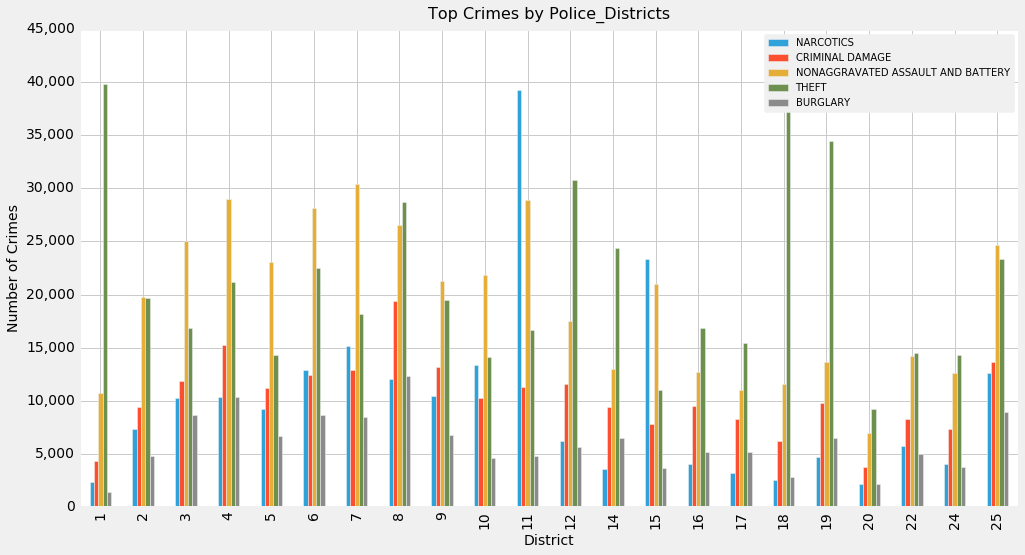

In [26]:
# crimes by district for top primary type
top_5 = data2['Primary Type4'].value_counts().head(5)
top_5_ls = list(dict(top_5).keys())
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_dist_wide[top_5_ls].plot(ax=ax, kind='bar')
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels([format(int(x),',d') for x in vals])
ax.legend(loc="upper right", fontsize=10)
plt.title("Top Crimes by Police_Districts",  y=1.01, size=16)
plt.xlabel("District",size=14)
plt.ylabel("Number of Crimes", size=14)

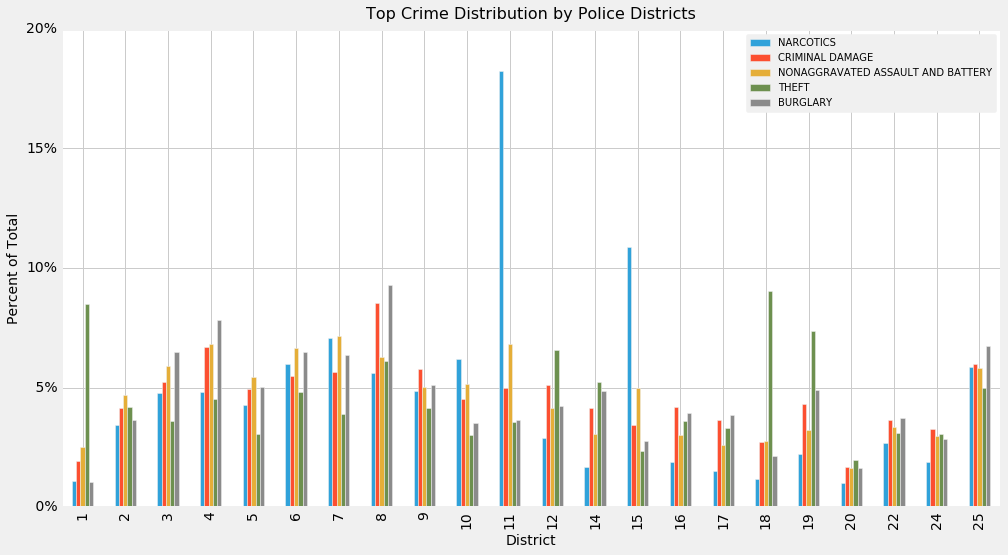

In [27]:
# crimes % by district for top primary type
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_dist_pct_wide[top_5_ls].plot(ax=ax, kind='bar')
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
# Add some more Labeling
ax.legend(loc="upper right", fontsize=10)
plt.title("Top Crime Distribution by Police Districts",  y=1.01, size=16)
plt.xlabel("District",size=14)
plt.ylabel("Percent of Total", size=14)

In [28]:
grouped_dist_pct_wide[top_5_ls]

Primary Type4,NARCOTICS,CRIMINAL DAMAGE,NONAGGRAVATED ASSAULT AND BATTERY,THEFT,BURGLARY
1,0.010979,0.019156,0.025311,0.085036,0.010372
2,0.034136,0.041338,0.046700,0.041908,0.036243
3,0.047667,0.052390,0.059024,0.036008,0.064811
4,0.048336,0.067137,0.068348,0.045226,0.078182
5,0.042768,0.049389,0.054428,0.030615,0.050147
6,0.059780,0.054730,0.066523,0.048059,0.064962
7,0.070638,0.056631,0.071669,0.038843,0.063661
8,0.056215,0.085373,0.062678,0.061253,0.092944
9,0.048712,0.057920,0.050180,0.041498,0.051185
10,0.062057,0.045078,0.051537,0.030231,0.035032


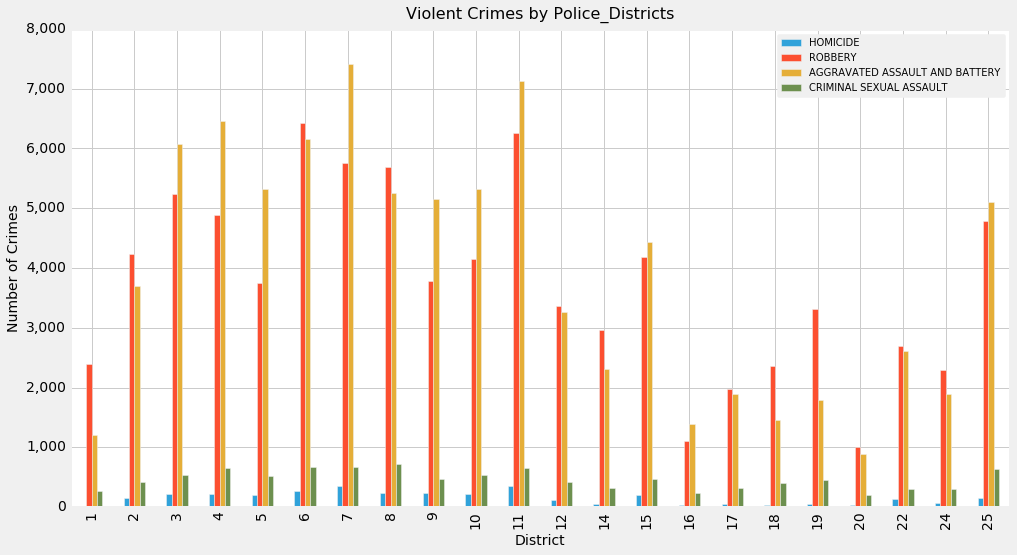

In [29]:
# crimes by district for violent crimes
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_dist_wide[list(violence_type)].plot(ax=ax, kind='bar')
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels([format(int(x),',d') for x in vals])
# Add some more Labeling
ax.legend(loc="upper right", fontsize=10)
plt.title("Violent Crimes by Police_Districts",  y=1.01, size=16)
plt.xlabel("District", size=14)
plt.ylabel("Number of Crimes", size=14)

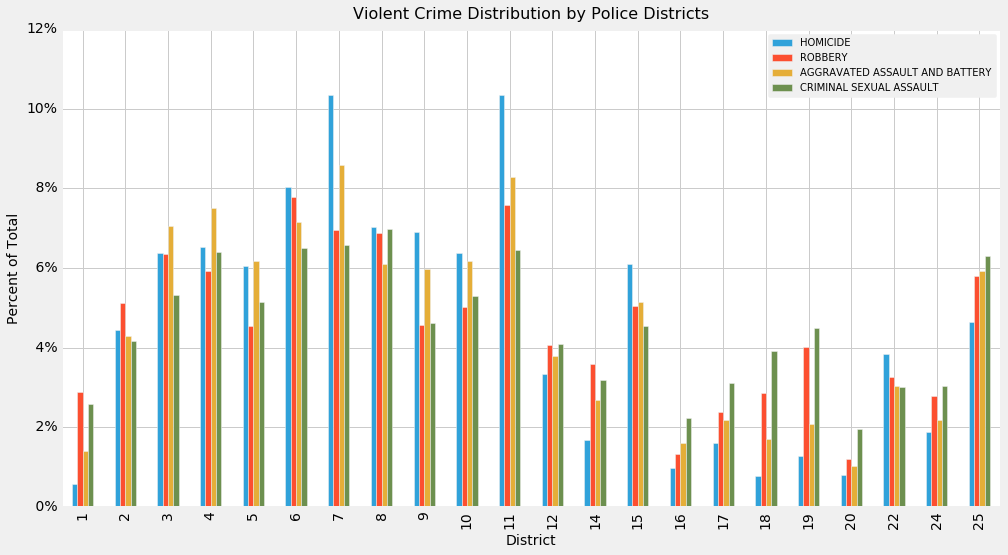

In [30]:
# crimes by district for violent crimes
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_dist_pct_wide[list(violence_type)].plot(ax=ax, kind='bar')
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
# Add some more Labeling
ax.legend(loc="upper right", fontsize=10)
plt.title("Violent Crime Distribution by Police Districts",  y=1.01, size=16)
plt.xlabel("District", size=14)
plt.ylabel("Percent of Total", size=14)

In [32]:
# group by to calculate percent of total by primary type 4 across location
top10_loc = list(dict(data3['Location Description'].value_counts().head(10)).keys())
grouped_loc_pct = pd.DataFrame(data3.groupby(['Primary Type4','Location Description']).ID.count())
grouped_loc_pct.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_loc_pct['Incidence_pct'] = grouped_loc_pct['Incidence_Count'].groupby(level=0).transform(lambda x: x/x.sum())
grouped_loc_pct.reset_index(inplace=True)
# print(grouped_loc_pct.head())
grouped_loc_pct_wide = grouped_loc_pct[grouped_loc_pct['Location Description'].isin(top10_loc)].pivot(index='Location Description', columns='Primary Type4', values='Incidence_pct')
grouped_loc_pct_wide.fillna(0, inplace=True)
grouped_loc_pct_wide.head()

Primary Type4,AGGRAVATED ASSAULT AND BATTERY,BURGLARY,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,DECEPTIVE PRACTICE,HOMICIDE,MOTOR VEHICLE THEFT,NARCOTICS,NONAGGRAVATED ASSAULT AND BATTERY,OTHER OFFENSE,ROBBERY,THEFT
Location Description,,,,,,,,,,,,
ALLEY,0.041872,0.000759,0.016028,0.061570,0.003183,0.056989,0.013635,0.068527,0.017297,0.007585,0.071117,0.008772
APARTMENT,0.148280,0.339787,0.126021,0.279855,0.082010,0.071386,0.002729,0.027661,0.228225,0.163139,0.016651,0.058483
OTHER,0.016470,0.029704,0.032750,0.040818,0.100723,0.000000,0.020592,0.010956,0.024737,0.060354,0.016215,0.055311
PARKING LOT/GARAGE(NON.RESID.),0.019741,0.001593,0.042218,0.007929,0.011550,0.000300,0.065436,0.029697,0.015713,0.007577,0.026465,0.046269
RESIDENCE,0.121116,0.349912,0.182292,0.337216,0.308042,0.000000,0.010658,0.040546,0.190881,0.419494,0.013856,0.098072


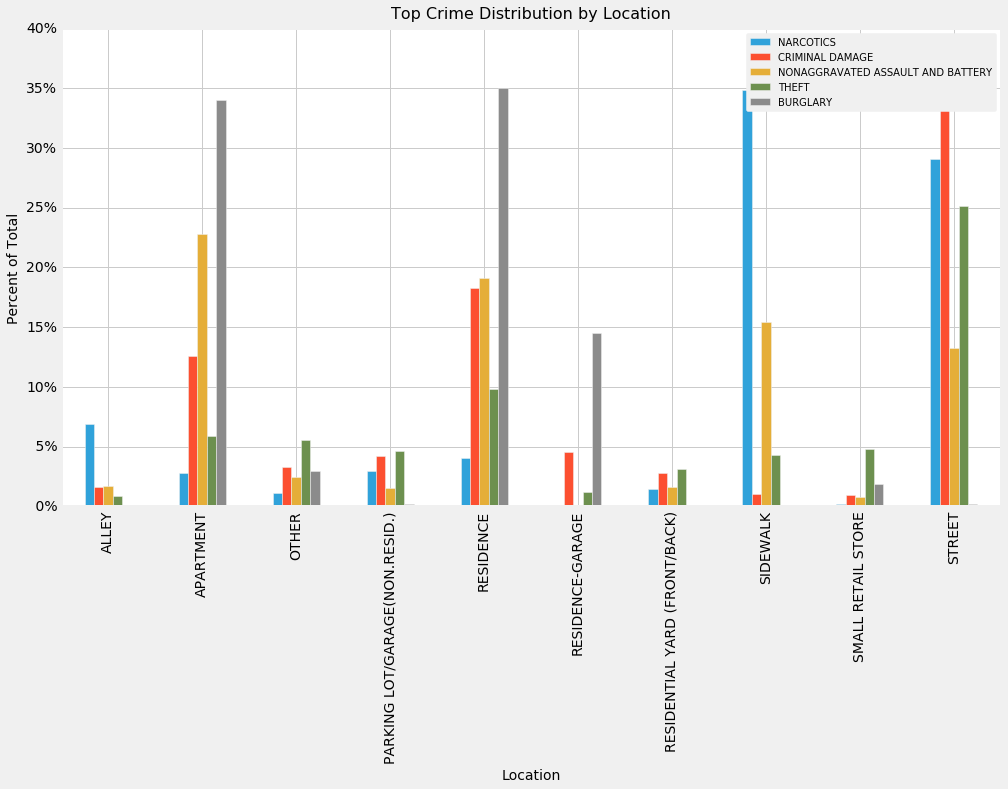

In [33]:
# crimes % by location for top primary type
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_loc_pct_wide[top_5_ls].plot(ax=ax, kind='bar')
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
# Add some more Labeling
ax.legend(loc="upper right", fontsize=10)
plt.title("Top Crime Distribution by Location",  y=1.01, size=16)
plt.xlabel("Location",size=14)
plt.ylabel("Percent of Total", size=14)

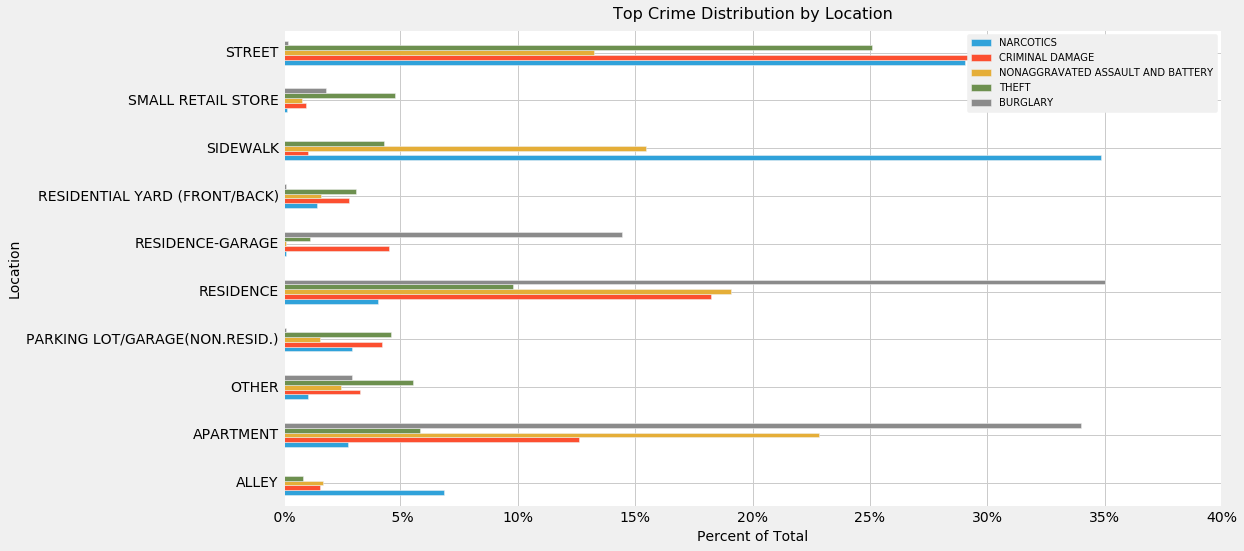

In [34]:
# crimes % by location for top primary type, horizontal bar chart more readable
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_loc_pct_wide[top_5_ls].plot(ax=ax, kind='barh')
ax.set_axis_bgcolor('white')
vals = ax.get_xticks()
ax.set_xticklabels(['{:2.0f}%'.format(x*100) for x in vals])

ax.legend(loc="upper right", fontsize=10)
plt.title("Top Crime Distribution by Location",  y=1.01, size=16)
plt.ylabel("Location",size=14)
plt.xlabel("Percent of Total", size=14)

In [35]:
grouped_loc_pct_wide[top_5_ls]

Primary Type4,NARCOTICS,CRIMINAL DAMAGE,NONAGGRAVATED ASSAULT AND BATTERY,THEFT,BURGLARY
Location Description,,,,,
ALLEY,0.068527,0.016028,0.017297,0.008772,0.000759
APARTMENT,0.027661,0.126021,0.228225,0.058483,0.339787
OTHER,0.010956,0.032750,0.024737,0.055311,0.029704
PARKING LOT/GARAGE(NON.RESID.),0.029697,0.042218,0.015713,0.046269,0.001593
RESIDENCE,0.040546,0.182292,0.190881,0.098072,0.349912
RESIDENCE-GARAGE,0.001413,0.045417,0.001482,0.011718,0.144628
RESIDENTIAL YARD (FRONT/BACK),0.014697,0.028197,0.016398,0.031293,0.001248
SIDEWALK,0.348406,0.010638,0.154564,0.043172,0.000413
SMALL RETAIL STORE,0.001901,0.009837,0.008068,0.047885,0.018295


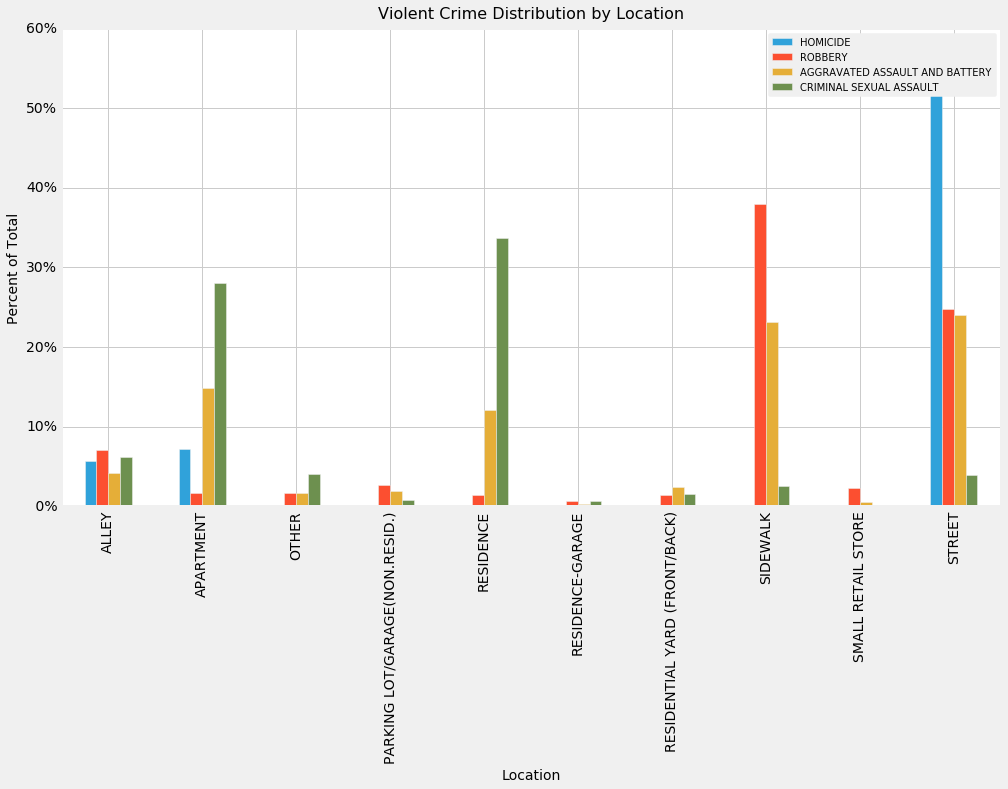

In [36]:
# violent crimes % by location for top primary type
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_loc_pct_wide[list(violence_type)].plot(ax=ax, kind='bar')
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
# Add some more Labeling
ax.legend(loc="upper right", fontsize=10)
plt.title("Violent Crime Distribution by Location",  y=1.01, size=16)
plt.xlabel("Location",size=14)
plt.ylabel("Percent of Total", size=14)

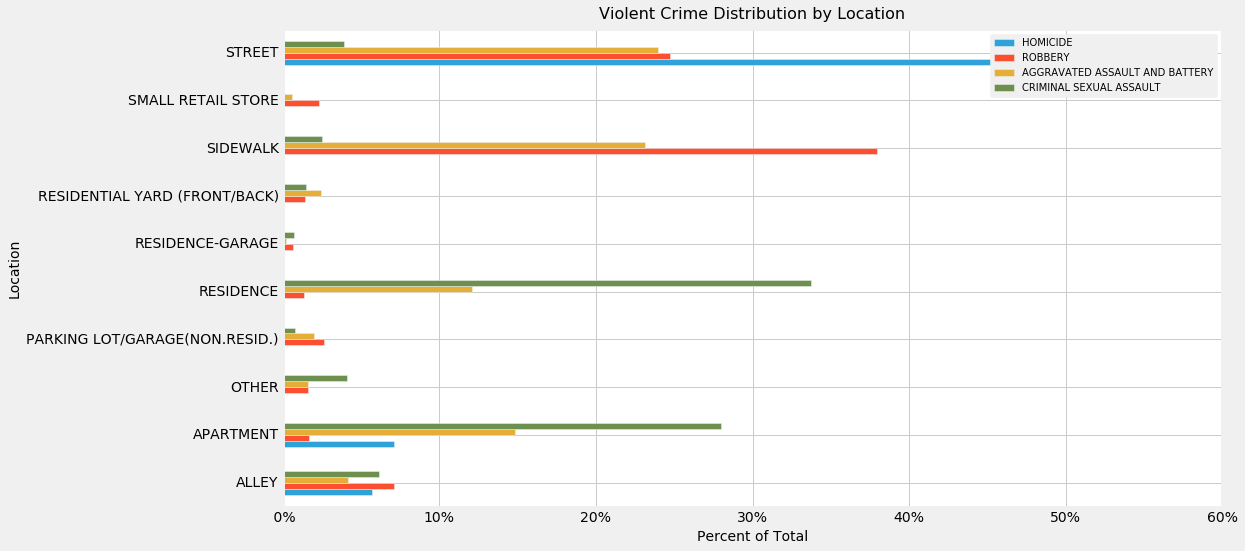

In [37]:
# violent crimes % by location for top primary type, horizontal bar more readable
fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_loc_pct_wide[list(violence_type)].plot(ax=ax, kind='barh')
ax.set_axis_bgcolor('white')
vals = ax.get_xticks()
ax.set_xticklabels(['{:2.0f}%'.format(x*100) for x in vals])

ax.legend(loc="upper right", fontsize=10)
plt.title("Violent Crime Distribution by Location",  y=1.01, size=16)
plt.ylabel("Location",size=14)
plt.xlabel("Percent of Total", size=14)

In [38]:
grouped_loc_pct_wide[list(violence_type)]

Primary Type4,HOMICIDE,ROBBERY,AGGRAVATED ASSAULT AND BATTERY,CRIMINAL SEXUAL ASSAULT
Location Description,,,,
ALLEY,0.056989,0.071117,0.041872,0.061570
APARTMENT,0.071386,0.016651,0.148280,0.279855
OTHER,0.000000,0.016215,0.016470,0.040818
PARKING LOT/GARAGE(NON.RESID.),0.000300,0.026465,0.019741,0.007929
RESIDENCE,0.000000,0.013856,0.121116,0.337216
RESIDENCE-GARAGE,0.000000,0.006789,0.002331,0.007244
RESIDENTIAL YARD (FRONT/BACK),0.000000,0.014049,0.024682,0.015172
SIDEWALK,0.000000,0.379438,0.231050,0.025059
SMALL RETAIL STORE,0.000000,0.023464,0.005892,0.000881


In [39]:
# which crimes are most prevalend at a specific location, like school
school=['SCHOOL, PRIVATE, BUILDING','SCHOOL, PRIVATE, GROUNDS', 'SCHOOL, PUBLIC, BUILDING','SCHOOL, PUBLIC, GROUNDS', 'SCHOOL YARD']
school_df = data2[data2['Location Description'].isin(school)]
loc[loc['Location Description'].isin(school)].groupby('Primary Type4').Incidence_Count.sum().sort_values(ascending=False)

Primary Type4
NONAGGRAVATED ASSAULT AND BATTERY    24437
THEFT                                12530
NARCOTICS                             4319
CRIMINAL DAMAGE                       3176
AGGRAVATED ASSAULT AND BATTERY        1487
OTHER OFFENSE                         1459
BURGLARY                               939
DECEPTIVE PRACTICE                     472
ROBBERY                                447
CRIMINAL SEXUAL ASSAULT                171
MOTOR VEHICLE THEFT                    123
HOMICIDE                                 2
Name: Incidence_Count, dtype: int64

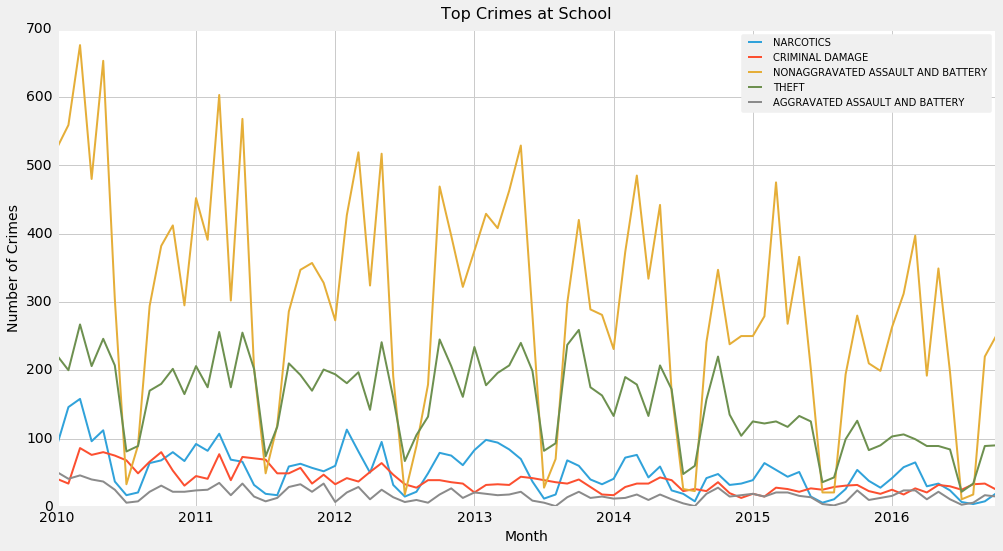

In [40]:
# school crime trend
grouped_yr_mo_sc = pd.DataFrame(school_df.groupby(['Primary Type4','Year','Month']).ID.count())
grouped_yr_mo_sc.reset_index(inplace=True)
grouped_yr_mo_sc.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_yr_mo_sc['Year_Month'] = grouped_yr_mo_sc.apply(lambda row: datetime(row.Year, int(row.Month), 1), axis=1)
grouped_yr_mo_sc_wide = grouped_yr_mo_sc.pivot(index='Year_Month', columns='Primary Type4', values='Incidence_Count')
grouped_yr_mo_sc_wide.head()

top_sc = school_df['Primary Type4'].value_counts().head(5)
top_sc_ls = list(dict(top_sc).keys())

fig, ax = plt.subplots(figsize=(15, 8))
ax = grouped_yr_mo_sc_wide[top_sc_ls].plot(ax=ax,linewidth=2)
ax.set_axis_bgcolor('white')
# Add some more Labeling
ax.legend(loc="upper right", fontsize=10)
plt.title("Top Crimes at School",  y=1.01, size=16)
plt.xlabel("Month", size=14)
plt.ylabel("Number of Crimes", size=14)

## Trend and Seasonality Analysis

This part is not used in final paper as David will provide charts

### Time Pattern

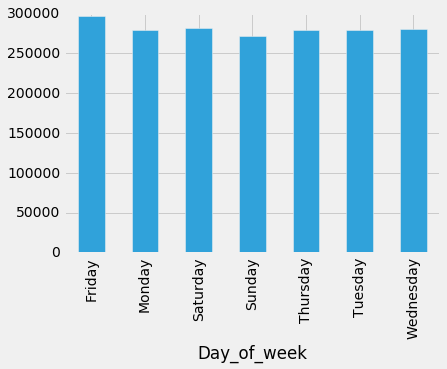

In [41]:
data2.groupby(data2.Day_of_week).ID.count().plot(kind='bar')

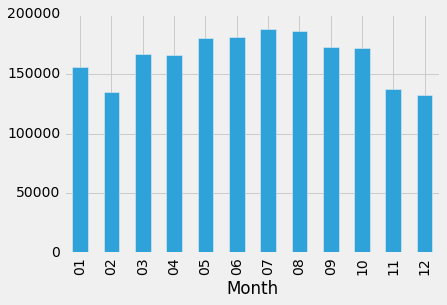

In [42]:
data2.groupby(data2.Month).ID.count().plot(kind='bar')

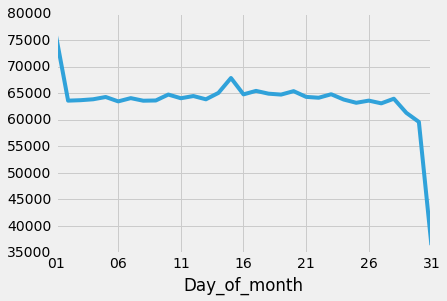

In [43]:
data2.groupby(data2.Day_of_month).ID.count().plot(kind='line')

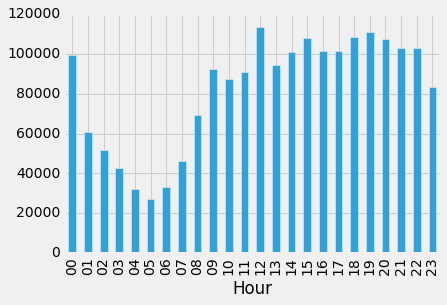

In [44]:
data2.groupby(data2.Hour).ID.count().plot(kind='bar')

In [45]:
data2[data2.Violence==1].Day_of_week.value_counts()

Sunday       28901
Saturday     28526
Friday       25832
Monday       25283
Wednesday    24692
Tuesday      24653
Thursday     24520
Name: Day_of_week, dtype: int64

### Overall trend and Seasonality

In [46]:
grouped_yr_mo = pd.DataFrame(data2.groupby(['Violence','Year','Month']).ID.count())
grouped_yr_mo.reset_index(inplace=True)
grouped_yr_mo.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_yr_mo['Year_Month'] = grouped_yr_mo.apply(lambda row: datetime(row.Year, int(row.Month), 1), axis=1)
print(grouped_yr_mo.head())
grouped_yr_mo_wide = grouped_yr_mo.pivot(index='Year_Month', columns='Violence', values='Incidence_Count')
print(grouped_yr_mo_wide.head())

  Violence  Year Month  Incidence_Count Year_Month
0    False  2010    01            24312 2010-01-01
1    False  2010    02            21321 2010-02-01
2    False  2010    03            27391 2010-03-01
3    False  2010    04            26711 2010-04-01
4    False  2010    05            28192 2010-05-01
Violence    False  True 
Year_Month              
2010-01-01  24312   2354
2010-02-01  21321   1726
2010-03-01  27391   2431
2010-04-01  26711   2670
2010-05-01  28192   2789


In [47]:
# # create separate dataframe for violent and non-violent
grouped_yr_mo_vol_wide = grouped_yr_mo[grouped_yr_mo['Violence']==True].pivot(index='Year_Month', columns='Violence', values='Incidence_Count')
grouped_yr_mo_nonvol_wide = grouped_yr_mo[grouped_yr_mo['Violence']==False].pivot(index='Year_Month', columns='Violence', values='Incidence_Count')

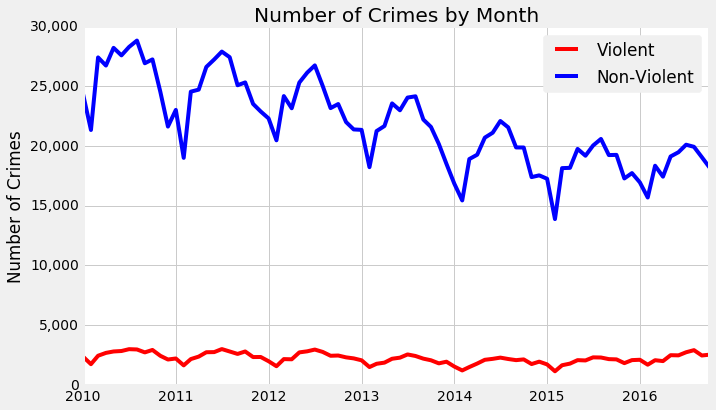

In [48]:
# option 1: plot both lines on 1 y-axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(grouped_yr_mo_vol_wide, 'k',  label = 'Violent', color = 'r')
ax.plot(grouped_yr_mo_nonvol_wide, 'k', label = 'Non-Violent', color = 'b')
vals = ax.get_yticks()
# ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.set_yticklabels([format(int(x),',d') for x in vals])
ax.set_title("Number of Crimes by Month")
ax.set_ylabel('Number of Crimes')
ax.legend(loc = 'upper right')
ax.set_axis_bgcolor('white')
# plt.savefig('3M_rolling_ave.png', bbox_inches = 'tight')

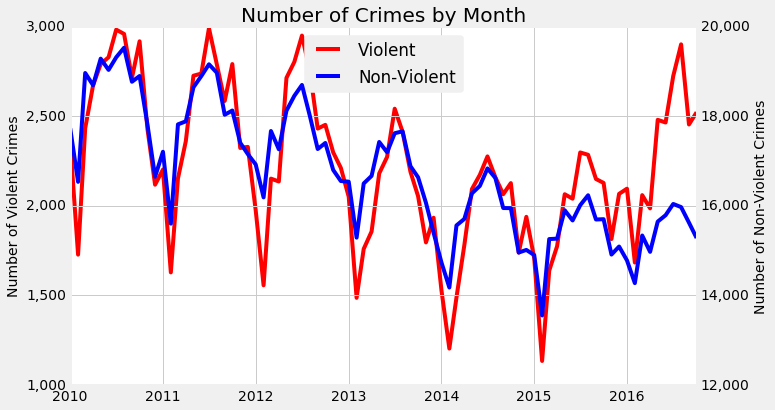

In [49]:
# option 2: plot both lines on two y-axis
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
lns1 = ax1.plot(grouped_yr_mo_vol_wide, 'k',  label = 'Violent', color = 'r')
ax1.set_axis_bgcolor('white')
ax1.set_ylabel('Number of Violent Crimes',size=14)
vals1 = ax1.get_yticks()
ax1.set_yticklabels([format(int(x),',d') for x in vals1])
# ax1.grid()
ax2 = ax1.twinx()
lns2 = ax2.plot(grouped_yr_mo_nonvol_wide, 'k', label = 'Non-Violent', color = 'b')
ax2.set_ylabel('Number of Non-Violent Crimes',size=14)
vals2 = ax2.get_yticks()
ax2.set_yticklabels([format(int(x),',d') for x in vals2])
# ax2.grid()
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper center")

ax1.set_ylim(ymin = 1000, ymax=3000)
ax2.set_ylim(ymin = 10000, ymax=30000)

plt.title("Number of Crimes by Month")

In [ ]:
# # Save dataset
# data2.to_csv(../project 2/Crimes_-_2010_to_present v2.csv')
# data2.to_html(../project 2/Crimes_-_2010_to_present v2.html')

## Analyze some specific crimes

### Crime Volume vs. Arrest Ratio

In [50]:
# detect correation between crime volume and arrest ratio for specific crimes
spec = ['DECEPTIVE PRACTICE','NARCOTICS','HOMICIDE']
grouped_spec = data2.groupby(['Primary Type4','Year','Month']).agg({'ID':np.count_nonzero,'Arrest':np.sum})
grouped_spec.reset_index(inplace=True)

grouped_spec.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_spec['Year_Month'] = grouped_spec.apply(lambda row: datetime(row.Year, int(row.Month), 1), axis=1)
grouped_spec['Arrest_Ratio'] = grouped_spec['Arrest']/grouped_spec['Incidence_Count']
print(grouped_spec.head())
grouped_spec_ra_wide = grouped_spec.pivot(index='Year_Month', columns='Primary Type4', values='Arrest_Ratio')
grouped_spec_wide = grouped_spec.pivot(index='Year_Month', columns='Primary Type4', values='Incidence_Count')

                    Primary Type4  Year Month  Arrest  Incidence_Count  \
0  AGGRAVATED ASSAULT AND BATTERY  2010    01   315.0              981   
1  AGGRAVATED ASSAULT AND BATTERY  2010    02   250.0              887   
2  AGGRAVATED ASSAULT AND BATTERY  2010    03   293.0             1262   
3  AGGRAVATED ASSAULT AND BATTERY  2010    04   316.0             1392   
4  AGGRAVATED ASSAULT AND BATTERY  2010    05   303.0             1412   

  Year_Month  Arrest_Ratio  
0 2010-01-01      0.321101  
1 2010-02-01      0.281849  
2 2010-03-01      0.232171  
3 2010-04-01      0.227011  
4 2010-05-01      0.214589  


In [51]:
spec

['DECEPTIVE PRACTICE', 'NARCOTICS', 'HOMICIDE']

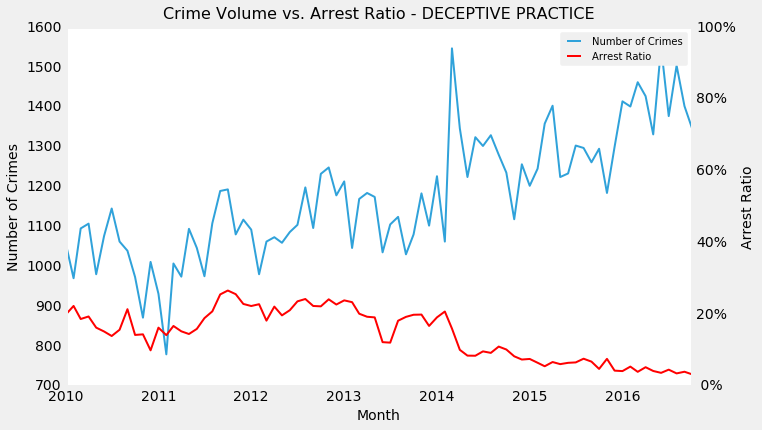

In [52]:
# plot spec[0], DECEPTIVE PRACTICE
fig = plt.figure(figsize=(10, 6))

plt.xlabel("Month", size=14)
ax1 = fig.add_subplot(111)
lns1 = ax1.plot(grouped_spec_wide[spec[0]],label='Number of Crimes',linewidth=2)
plt.ylabel("Number of Crimes", size=14)
ax1.set_axis_bgcolor('white')
ax1.grid(False)
ax2 = ax1.twinx()
lns2 = ax2.plot(grouped_spec_ra_wide[spec[0]],label='Arrest Ratio',linewidth=2,color='r')
plt.ylabel("Arrest Ratio", size=14)
ax2.grid(False)
ax2.set_ylim(0.0,1.0)
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper right",fontsize=10)
plt.title("Crime Volume vs. Arrest Ratio - DECEPTIVE PRACTICE",  y=1.01, size=16)
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper right",fontsize=10)
plt.title("Crime Volume vs. Arrest Ratio - DECEPTIVE PRACTICE",  y=1.01, size=16)


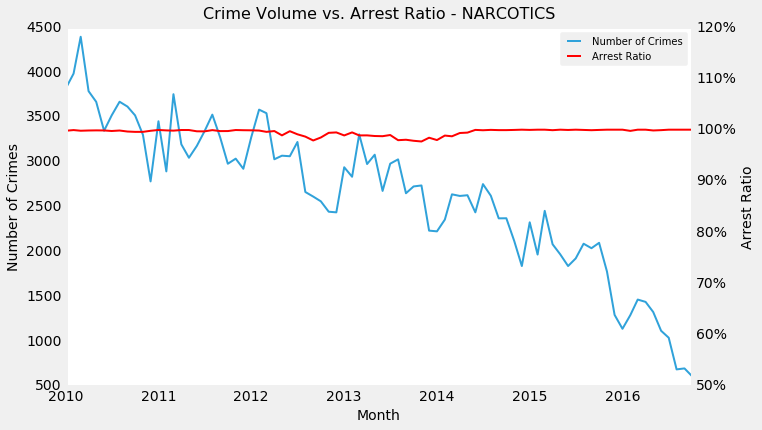

In [53]:
# plot spec[1], NARCOTICS, arest_ratio is close to 1
fig = plt.figure(figsize=(10, 6))

plt.xlabel("Month", size=14)
ax1 = fig.add_subplot(111)
lns1 = ax1.plot(grouped_spec_wide[spec[1]],label='Number of Crimes',linewidth=2)
plt.ylabel("Number of Crimes", size=14)
ax1.set_axis_bgcolor('white')
ax1.grid(False)
ax2 = ax1.twinx()
lns2 = ax2.plot(grouped_spec_ra_wide[spec[1]],label='Arrest Ratio',linewidth=2,color='r')
plt.ylabel("Arrest Ratio", size=14)
ax2.grid(False)
ax2.set_ylim(0.5, 1.2)
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper right",fontsize=10)
plt.title("Crime Volume vs. Arrest Ratio - NARCOTICS",  y=1.01, size=16)

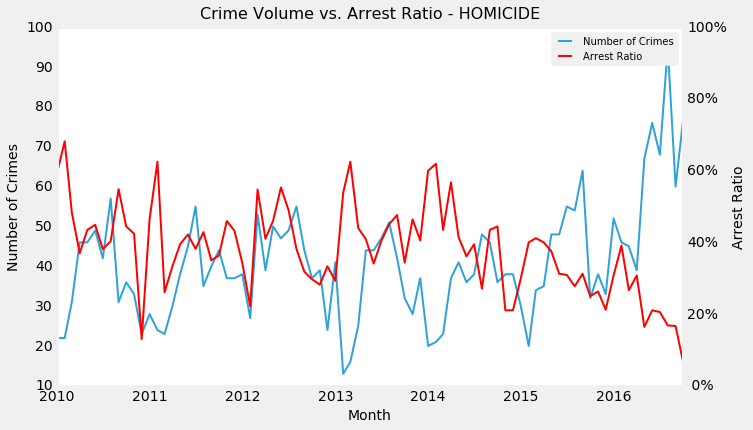

In [54]:
# plot spec[2], HOMICIDE
fig = plt.figure(figsize=(10, 6))

plt.xlabel("Month", size=14)
ax1 = fig.add_subplot(111)
lns1 = ax1.plot(grouped_spec_wide[spec[2]],label='Number of Crimes',linewidth=2)
plt.ylabel("Number of Crimes", size=14)
ax1.set_axis_bgcolor('white')
ax1.grid(False)
ax2 = ax1.twinx()
lns2 = ax2.plot(grouped_spec_ra_wide[spec[2]],label='Arrest Ratio',linewidth=2,color='r')
plt.ylabel("Arrest Ratio", size=14)
ax2.grid(False)
ax2.set_ylim(0.0, 1.0)
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper right",fontsize=10)
plt.title("Crime Volume vs. Arrest Ratio - HOMICIDE",  y=1.01, size=16)

In [55]:
# output some data for further check
grouped_violent = data2[data2['Violence'] == True].groupby(['Primary Type4','Year','Month']).agg({'ID':np.count_nonzero,'Arrest':np.sum})
grouped_violent.reset_index(inplace=True)
grouped_violent.to_csv('Violent Trend.csv')

### Temperature Analysis

In [56]:
# analyze temperature and crime volume in winter
# subset data to include Jan and Feb only
grouped_we = pd.DataFrame(data2[(data2.Month=='01')|(data2.Month=='02')].groupby(['Primary Type4','Year','Month']).ID.count())
grouped_we.reset_index(inplace=True)
grouped_we.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_we['Year_Month'] = grouped_we.apply(lambda row: datetime(row.Year, int(row.Month), 1), axis=1)
print(grouped_we.head())

                    Primary Type4  Year Month  Incidence_Count Year_Month
0  AGGRAVATED ASSAULT AND BATTERY  2010    01              981 2010-01-01
1  AGGRAVATED ASSAULT AND BATTERY  2010    02              887 2010-02-01
2  AGGRAVATED ASSAULT AND BATTERY  2011    01              902 2011-01-01
3  AGGRAVATED ASSAULT AND BATTERY  2011    02              729 2011-02-01
4  AGGRAVATED ASSAULT AND BATTERY  2012    01              781 2012-01-01


In [57]:
we.index=we.Year_Month
we.index

DatetimeIndex(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2010-02-01',
               '2011-02-01', '2012-02-01', '2013-02-01', '2014-02-01',
               '2015-02-01', '2016-02-01'],
              dtype='datetime64[ns]', name='Year_Month', freq=None)

In [58]:
grouped_we.index=grouped_we.Year_Month
grouped_we.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2011-01-01', '2011-02-01',
               '2012-01-01', '2012-02-01', '2013-01-01', '2013-02-01',
               '2014-01-01', '2014-02-01',
               ...
               '2012-01-01', '2012-02-01', '2013-01-01', '2013-02-01',
               '2014-01-01', '2014-02-01', '2015-01-01', '2015-02-01',
               '2016-01-01', '2016-02-01'],
              dtype='datetime64[ns]', name='Year_Month', length=168, freq=None)

In [59]:
te = we['Temparature']
we_df = grouped_we.join(te, how='outer')
we_df.head()

,Primary Type4,Year,Month,Incidence_Count,Year_Month,Temparature
Year_Month,,,,,,
2010-01-01,AGGRAVATED ASSAULT AND BATTERY,2010,01,981,2010-01-01,22.0
2010-01-01,BURGLARY,2010,01,1951,2010-01-01,22.0
2010-01-01,CRIMINAL DAMAGE,2010,01,2796,2010-01-01,22.0
2010-01-01,CRIMINAL SEXUAL ASSAULT,2010,01,131,2010-01-01,22.0
2010-01-01,DECEPTIVE PRACTICE,2010,01,1058,2010-01-01,22.0


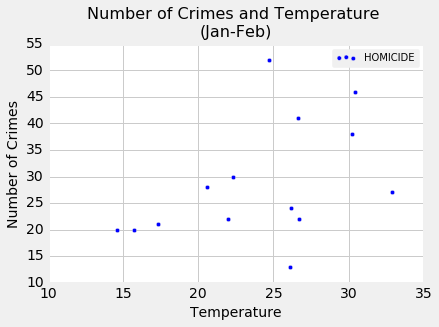

In [60]:
crime='HOMICIDE'
ax = we_df[we_df['Primary Type4']==crime].plot(x='Temparature',y='Incidence_Count',kind='scatter',label=crime)
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels([format(int(x),',d') for x in vals])
ax.legend(loc="upper right", fontsize=10)
plt.title("Number of Crimes and Temperature \n(Jan-Feb)",  y=1.01, size=16)
plt.xlabel("Temperature",size=14)
plt.ylabel("Number of Crimes", size=14)

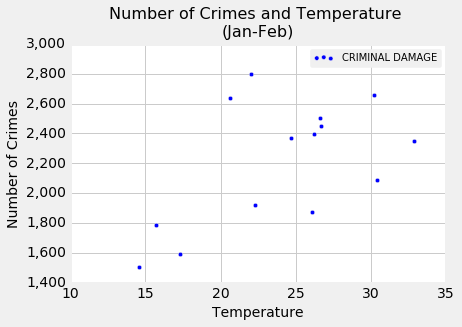

In [61]:
crime='CRIMINAL DAMAGE'
ax = we_df[we_df['Primary Type4']==crime].plot(x='Temparature',y='Incidence_Count',kind='scatter',label=crime)
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels([format(int(x),',d') for x in vals])
ax.legend(loc="upper right", fontsize=10)
plt.title("Number of Crimes and Temperature \n(Jan-Feb)",  y=1.01, size=16)
plt.xlabel("Temperature",size=14)
plt.ylabel("Number of Crimes", size=14)

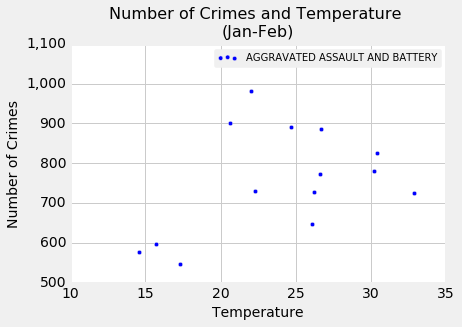

In [62]:
crime='AGGRAVATED ASSAULT AND BATTERY'
ax = we_df[we_df['Primary Type4']==crime].plot(x='Temparature',y='Incidence_Count',kind='scatter',label=crime)
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels([format(int(x),',d') for x in vals])
ax.legend(loc="upper right", fontsize=10)
plt.title("Number of Crimes and Temperature \n(Jan-Feb)",  y=1.01, size=16)
plt.xlabel("Temperature",size=14)
plt.ylabel("Number of Crimes", size=14)

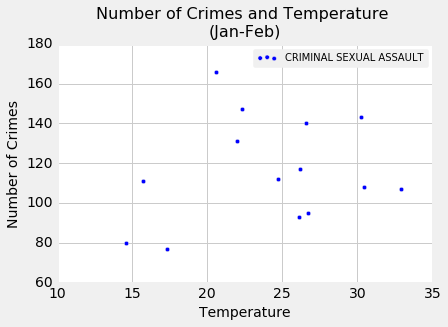

In [63]:
crime='CRIMINAL SEXUAL ASSAULT'
ax = we_df[we_df['Primary Type4']==crime].plot(x='Temparature',y='Incidence_Count',kind='scatter',label=crime)
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels([format(int(x),',d') for x in vals])
ax.legend(loc="upper right", fontsize=10)
plt.title("Number of Crimes and Temperature \n(Jan-Feb)",  y=1.01, size=16)
plt.xlabel("Temperature",size=14)
plt.ylabel("Number of Crimes", size=14)

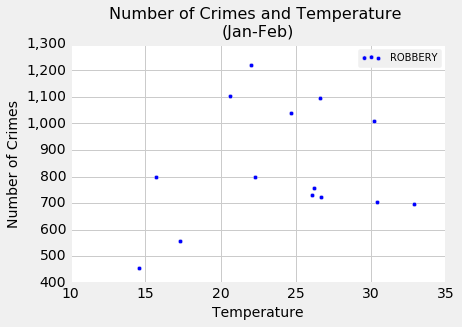

In [64]:
crime='ROBBERY'
ax = we_df[we_df['Primary Type4']==crime].plot(x='Temparature',y='Incidence_Count',kind='scatter',label=crime)
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels([format(int(x),',d') for x in vals])
ax.legend(loc="upper right", fontsize=10)
plt.title("Number of Crimes and Temperature \n(Jan-Feb)",  y=1.01, size=16)
plt.xlabel("Temperature",size=14)
plt.ylabel("Number of Crimes", size=14)

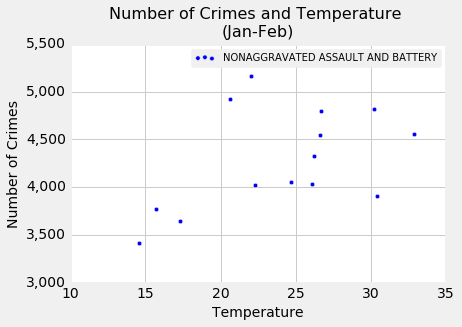

In [65]:
crime='NONAGGRAVATED ASSAULT AND BATTERY'
ax = we_df[we_df['Primary Type4']==crime].plot(x='Temparature',y='Incidence_Count',kind='scatter',label=crime)
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels([format(int(x),',d') for x in vals])
ax.legend(loc="upper right", fontsize=10)
plt.title("Number of Crimes and Temperature \n(Jan-Feb)",  y=1.01, size=16)
plt.xlabel("Temperature",size=14)
plt.ylabel("Number of Crimes", size=14)

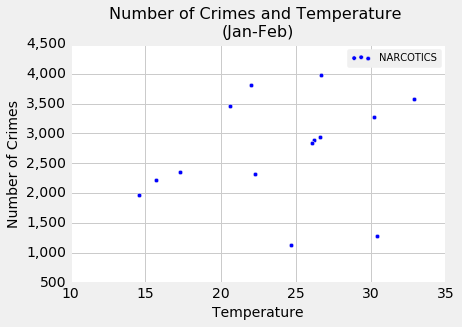

In [66]:
crime='NARCOTICS'
ax = we_df[we_df['Primary Type4']==crime].plot(x='Temparature',y='Incidence_Count',kind='scatter',label=crime)
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels([format(int(x),',d') for x in vals])
ax.legend(loc="upper right", fontsize=10)
plt.title("Number of Crimes and Temperature \n(Jan-Feb)",  y=1.01, size=16)
plt.xlabel("Temperature",size=14)
plt.ylabel("Number of Crimes", size=14)

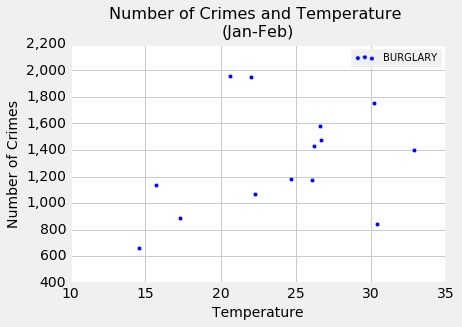

In [67]:
crime='BURGLARY'
ax = we_df[we_df['Primary Type4']==crime].plot(x='Temparature',y='Incidence_Count',kind='scatter',label=crime)
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels([format(int(x),',d') for x in vals])
ax.legend(loc="upper right", fontsize=10)
plt.title("Number of Crimes and Temperature \n(Jan-Feb)",  y=1.01, size=16)
plt.xlabel("Temperature",size=14)
plt.ylabel("Number of Crimes", size=14)

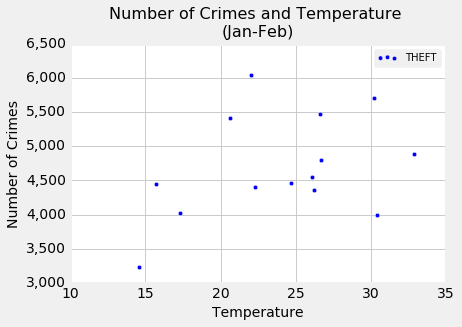

In [68]:
crime='THEFT'
ax = we_df[we_df['Primary Type4']==crime].plot(x='Temparature',y='Incidence_Count',kind='scatter',label=crime)
ax.set_axis_bgcolor('white')
vals = ax.get_yticks()
ax.set_yticklabels([format(int(x),',d') for x in vals])
ax.legend(loc="upper right", fontsize=10)
plt.title("Number of Crimes and Temperature \n(Jan-Feb)",  y=1.01, size=16)
plt.xlabel("Temperature",size=14)
plt.ylabel("Number of Crimes", size=14)